<a href="https://colab.research.google.com/github/dragonSsol/AIStudy/blob/main/HW5_2022451101_%EC%9A%A9%EC%86%94%EB%AF%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2022451101 용솔미

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Malaria cell image


In [ ]:
# google drives에 있는
!gdown https://drive.google.com/uc?id=1ltb17XfnctRe1j0rS6uJX4muJUNRvPvZ #https://drive.google.com/file/d/1ltb17XfnctRe1j0rS6uJX4muJUNRvPvZ/view?usp=sharing


Downloading...
From: https://drive.google.com/uc?id=1ltb17XfnctRe1j0rS6uJX4muJUNRvPvZ
To: /content/cell_images.zip
100% 338M/338M [00:01<00:00, 217MB/s]


In [ ]:


!unzip -qq '/content/cell_images.zip'

In [ ]:
!mkdir cell_images

In [ ]:
!mv '/content/Parasitized' '/content/cell_images/Parasitized'
!mv '/content/Uninfected' '/content/cell_images/Uninfected'

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# use following command to install cv2 package
# pip install opencv-python
import cv2

### Displaying Uninfected and Infected Cell tissues


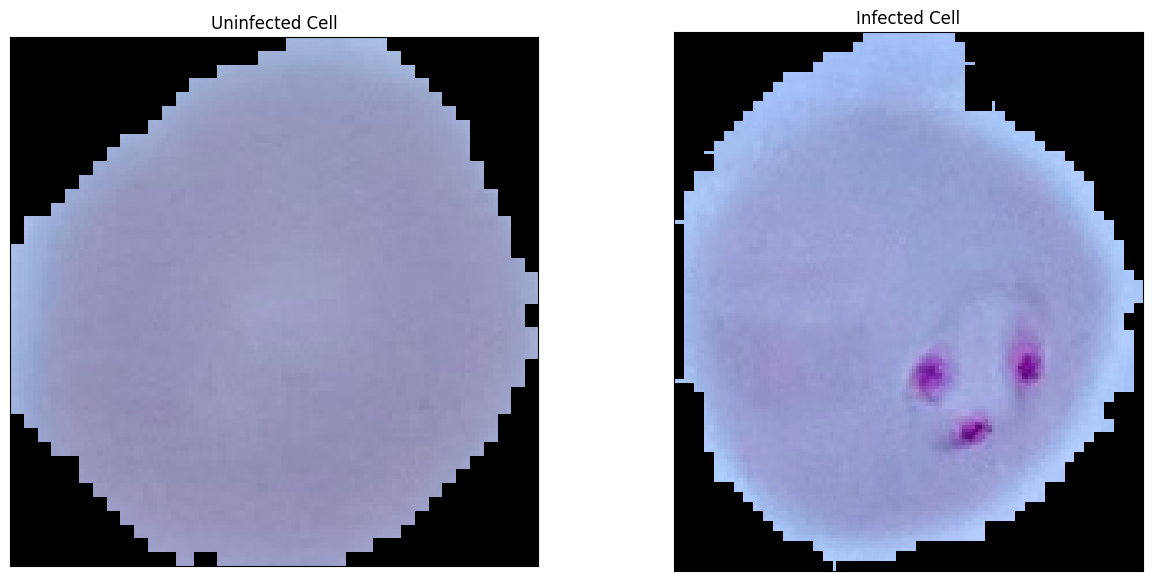

In [ ]:
upic='/content/cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png'
apic='/content/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

### Dividing Dataset into two folders train and test

In [ ]:
width = 128
height = 128
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [ ]:
trainDatagen = datagen.flow_from_directory(directory='/content/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [ ]:
valDatagen = datagen.flow_from_directory(directory='/content/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


### build keras model

In [ ]:

model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(width, height, 3)),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      tf.keras.layers.Dropout(0.25),

      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      tf.keras.layers.Dropout(0.25),


      # Flatten the feature maps
      tf.keras.layers.Flatten(),

      # Dense layers
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(0.5),

      # Output layer
      tf.keras.layers.Dense(2)
      ])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 30, 30, 32)       

### model fit

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_nn = model.fit(trainDatagen, epochs=10, validation_data=valDatagen)
'''
model.compile(optimizer='adam',loss= 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(trainDatagen, epochs=20, batch_size=64, validation_data=valDatagen)
'''

Epoch 1/10
1378/1378 [==============================] - 30s 21ms/step - loss: 0.6863 - accuracy: 0.5498 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
1378/1378 [==============================] - 29s 21ms/step - loss: 0.6933 - accuracy: 0.4891 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
1378/1378 [==============================] - 29s 21ms/step - loss: 0.4609 - accuracy: 0.7967 - val_loss: 0.2446 - val_accuracy: 0.9272
Epoch 4/10
1378/1378 [==============================] - 30s 22ms/step - loss: 0.2810 - accuracy: 0.9178 - val_loss: 0.2584 - val_accuracy: 0.9281
Epoch 5/10
1378/1378 [==============================] - 29s 21ms/step - loss: 0.2495 - accuracy: 0.9223 - val_loss: 0.1974 - val_accuracy: 0.9330
Epoch 6/10
1378/1378 [==============================] - 28s 21ms/step - loss: 0.2310 - accuracy: 0.9206 - val_loss: 0.1902 - val_accuracy: 0.9290
Epoch 7/10
1378/1378 [==============================] - 29s 21ms/step - loss: 0.2310 - accuracy: 0.9182 - val_loss: 0.1903 -

## **Bayesian CNN by using MC dropout**

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications import MobileNet, MobileNetV2,VGG16
#from tensorflow.keras.models import Model,Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Conv2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import Callback
from tensorflow.python.client import device_lib

In [ ]:
#Create the MC-dropout function

class MCDropoutLayer(tf.keras.layers.Layer):
    def __init__(self, p=0.5, mc=False, **kwargs):
        super(MCDropoutLayer, self).__init__(**kwargs)
        self.dropout_layer = tf.keras.layers.Dropout(p)
        self.mc = mc

    def call(self, inputs, training=None):
        if self.mc:
            return self.dropout_layer(inputs, training=True)
        else:
            return self.dropout_layer(inputs)

    def get_config(self):
        config = super(DropoutLayer, self).get_config()
        config.update({'p': self.dropout_layer.rate, 'mc': self.mc})
        return config

    def compute_output_shape(self, input_shape):
        return input_shape

In [ ]:
# define the keras model
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(width, height, 3)),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      MCDropoutLayer(0.2, mc=True),

      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      MCDropoutLayer(0.2, mc=True),


      # Flatten the feature maps
      tf.keras.layers.Flatten(),
      MCDropoutLayer(0.2, mc=True),

      # Dense layers
      tf.keras.layers.Dense(128, activation='relu'),
      MCDropoutLayer(0.2, mc=True),

      # Output layer
      tf.keras.layers.Dense(2, activation='sigmoid')
      ])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 mc_dropout_layer_12 (MCDro  (None, 63, 63, 32)        0         
 poutLayer)                                                      
                                                                 
 conv2d_19 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                      

In [ ]:
model.compile(optimizer='adam',loss= 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(trainDatagen, epochs=20, batch_size=64, validation_data=valDatagen)


Epoch 1/20
1378/1378 [==============================] - 35s 24ms/step - loss: 4.9596 - accuracy: 0.5350 - val_loss: 0.4844 - val_accuracy: 0.7944
Epoch 2/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.6429 - accuracy: 0.6105 - val_loss: 0.7073 - val_accuracy: 0.5263
Epoch 3/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.6706 - accuracy: 0.5588 - val_loss: 0.6913 - val_accuracy: 0.5218
Epoch 4/20
1378/1378 [==============================] - 34s 24ms/step - loss: 0.6535 - accuracy: 0.5356 - val_loss: 3.0070 - val_accuracy: 0.5465
Epoch 5/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.5915 - accuracy: 0.5800 - val_loss: 0.3787 - val_accuracy: 0.3944
Epoch 6/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.4748 - accuracy: 0.4857 - val_loss: 0.4003 - val_accuracy: 0.5590
Epoch 7/20
1378/1378 [==============================] - 32s 23ms/step - loss: 0.4039 - accuracy: 0.5759 - val_loss: 0.6387 -

In [ ]:
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.1965
Validation Accuracy: 0.0869


### Uncertainty in prediction


In [ ]:
import numpy as np

class_num = 2
class_name = ['Parasitized','Uninfected']

test_images = []
test_labels = []

# Iterate over the generator
for i in range(len(valDatagen)):
    images, labels = valDatagen[i]

    test_images.extend(images)
    test_labels.extend(labels)

    if (i + 1) * valDatagen.batch_size >= valDatagen.samples:
        break

# Convert the lists to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
n_model = 100
mc_predictions = []
'''
for j in range(n_model):
    if j % 10 == 0:
        print(f"Progress at iteration {j}")
    CNN_prediction = model.predict(test_images)
    response = np.array(CNN_prediction)
    mc_predictions.append(response)
    '''
batch_size = 64
for j in range(n_model):
    if j % 10 == 0:
        print(f"Progress at iteration {j}")
    batch_predictions = []
    for i in range(0, len(test_images), batch_size):
        batch = test_images[i:i+batch_size]
        batch_prediction = model.predict(batch)
        batch_predictions.append(batch_prediction)
    mc_predictions.append(np.concatenate(batch_predictions))

Progress at iteration 0
1/1 [==============================] - 0s 19ms/step
Progress at iteration 10
1/1 [==============================] - 0s 18ms/step
Progress at iteration 20
2/2 [==============================] - 0s 6ms/step


KeyboardInterrupt: ignored

In [ ]:
mc_predictions_ = np.array(mc_predictions)
print(mc_predictions_.shape) # number of models x test sample size x  number of category

(100, 5510, 1)


In [ ]:
test_labels[8].argmax()

0

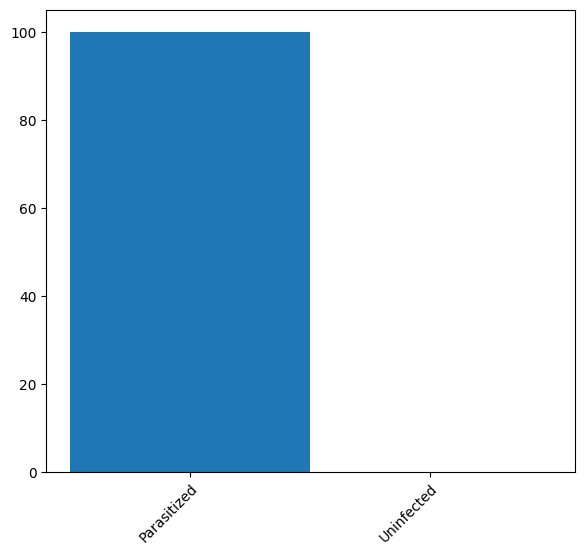

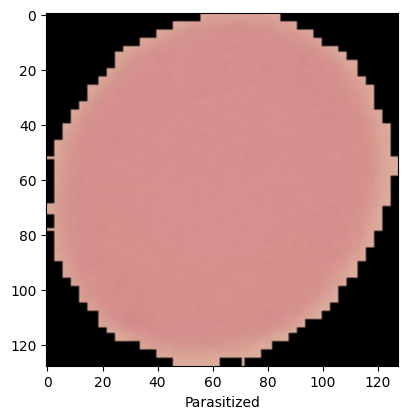

In [ ]:
i= 10
predicted_label=mc_predictions_[:,i,:].argmax(axis=1)
plt.figure(figsize=(15, 6))
ax=plt.subplot(1, 2, 1)
plt.hist(predicted_label,range=[0,2],bins=2, align='left')
plt.figure(figsize=(10,10))
xticks = [i for i in range(2)]
ax.set_xticks(xticks)
ax.set_xticklabels(class_name,rotation=45, rotation_mode="anchor", ha="right")
plt.subplot(1, 2, 2)
plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.xlabel(class_name[int(test_labels[i].argmax())])
plt.show()

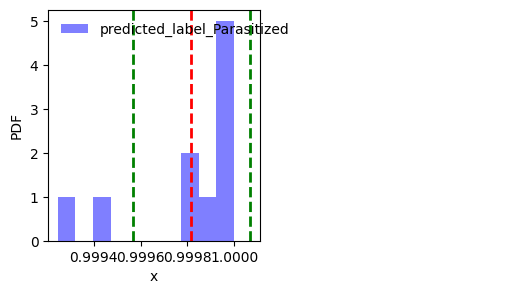

In [ ]:

df = pd.DataFrame({
      f'predicted_label_{class_name[0]}': mc_predictions_[:,i,0]
      #,
      #f'predicted_label_{class_name[1]}': mc_predictions_[:,i,1]
    })


# Generically define how many plots along and across
ncols = 2
nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 3))

# Lazy counter so we can remove unwated axes
counter = 0
for i in range(ncols):
    ax = axes[i]
    if counter < len(df.columns):
        data = df[df.columns[counter]]
        ax.hist(data, color='blue', alpha=0.5, label='{}'.format(df.columns[counter]))
        ax.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=2)  # mean line
        ax.axvline(np.mean(data) + np.std(data), color='green', linestyle='dashed', linewidth=2)  # std line
        ax.axvline(np.mean(data) - np.std(data), color='green', linestyle='dashed', linewidth=2)  # std line
        ax.set_xlabel('x')
        ax.set_ylabel('PDF')
        leg = ax.legend(loc='upper left')
        leg.draw_frame(False)
    else:
        ax.set_axis_off()

    counter += 1

plt.show()